In [28]:
import pandas as pd

In [29]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/bloodsamplesdataset.csv")

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
display(df.head())

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [32]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                      

<ipython-input-33-10bdaa4a8cb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Disease'], palette='coolwarm', order=df['Disease'].value_counts().index)


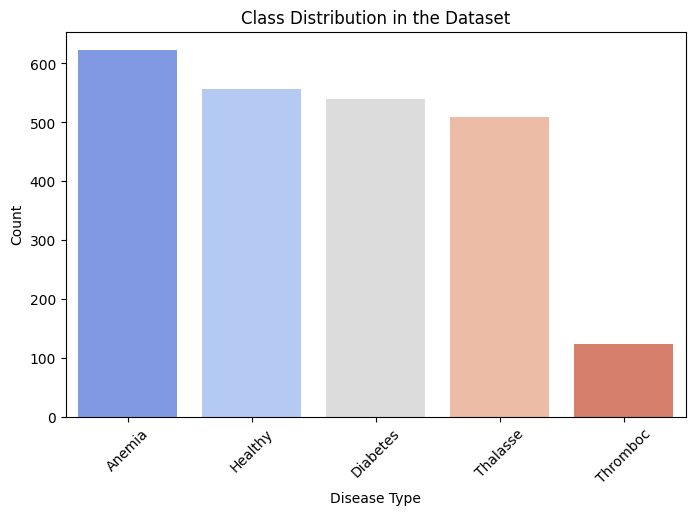

In [33]:
# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Disease'], palette='coolwarm', order=df['Disease'].value_counts().index)
plt.title("Class Distribution in the Dataset")
plt.xlabel("Disease Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

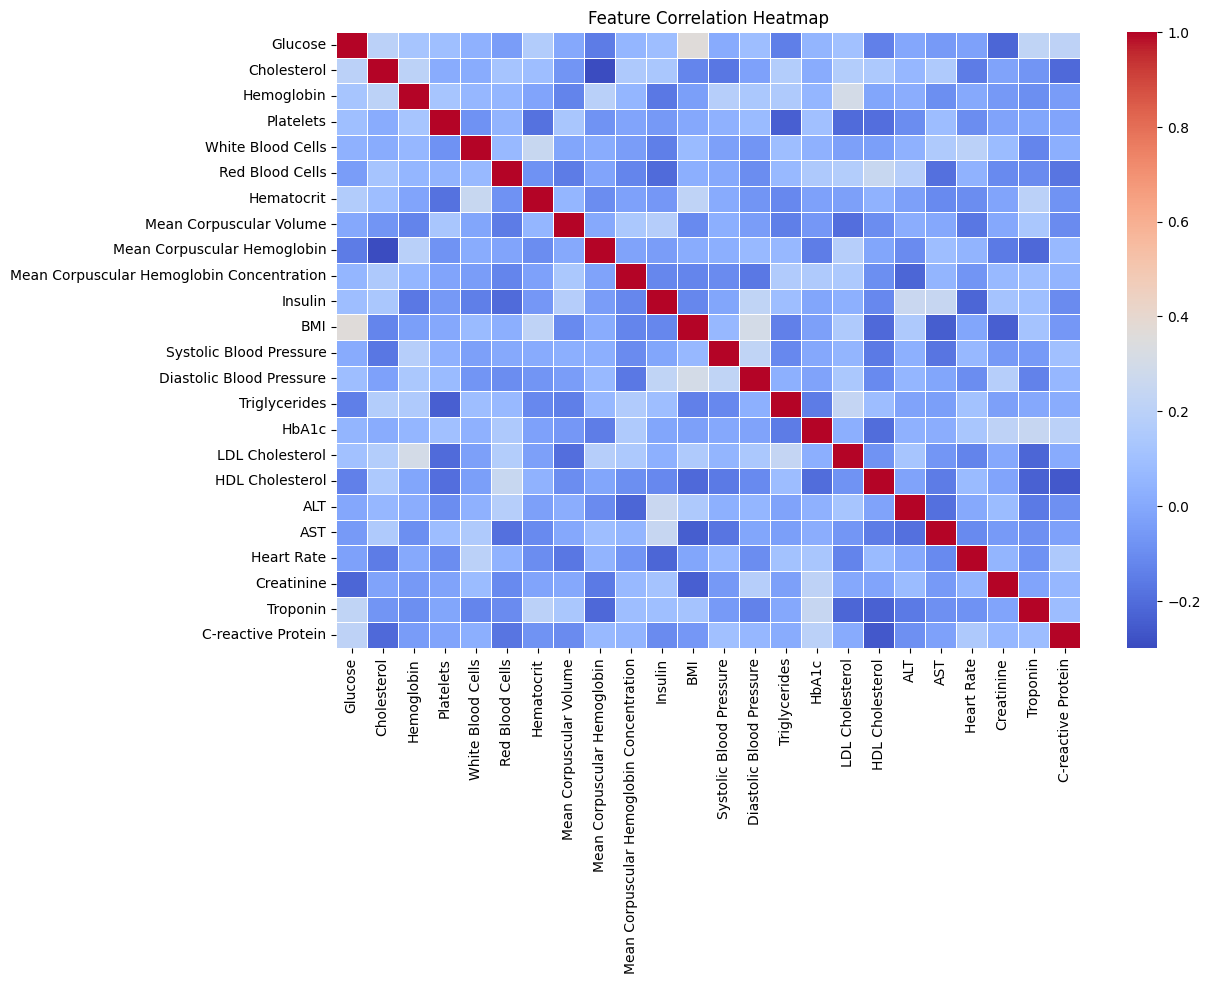

In [34]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Disease']).corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target (y)
X = df.drop(columns=["Disease"])  # Drop target column for classification
y = df["Disease"]

# Encode categorical target variable (Disease)
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Converts categories to numbers (0,1,2, etc.)

# Encode categorical features if present
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])

# Split dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression function
def logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)

        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Train Logistic Regression from Scratch
weights, bias = logistic_regression(X_train, y_train)

# Predictions
y_pred_prob = sigmoid(np.dot(X_test, weights) + bias)
y_pred = [1 if i > 0.5 else 0 for i in y_pred_prob]

# Evaluate Model
from sklearn.metrics import accuracy_score
print("Custom Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Custom Logistic Regression Accuracy: 0.23779193205944799


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

X_reg = df.drop(columns=["Disease"])  # Features
y_reg = df["Disease"]  # Target

# Encode the target variable (y_reg) to numerical values
encoder = LabelEncoder()
y_reg = encoder.fit_transform(y_reg)  # Convert disease names to numerical labels

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Model 1: Linear Regression
model1 = LinearRegression()
model1.fit(X_train_reg, y_train_reg)
y_pred1 = model1.predict(X_test_reg)

# Model 2: Random Forest Regression
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train_reg, y_train_reg)
y_pred2 = model2.predict(X_test_reg)

# Model Evaluation
print("Linear Regression R²:", r2_score(y_test_reg, y_pred1))
print("Random Forest R²:", r2_score(y_test_reg, y_pred2))

Linear Regression R²: 0.5330726367621461
Random Forest R²: 1.0


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of trees
    "max_depth": [3, 5, 10],  # Tree depth
    "min_samples_split": [2, 5, 10]  # Minimum samples required to split a node
}

# Apply Grid Search for Random Forest Regressor
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_reg, y_train_reg)

# Best hyperparameters
print("Best parameters for Random Forest:", grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [37]:
from sklearn.feature_selection import RFE

# Feature Selection for Logistic Regression
selector1 = RFE(model1, n_features_to_select=5)
selector1.fit(X_train, y_train)
selected_features1 = X.columns[selector1.support_]

# Feature Selection for Random Forest
selector2 = RFE(model2, n_features_to_select=5)
selector2.fit(X_train, y_train)
selected_features2 = X.columns[selector2.support_]

print("Best features for Logistic Regression:", selected_features1)
print("Best features for Random Forest:", selected_features2)

Best features for Logistic Regression: Index(['Hemoglobin', 'Platelets', 'White Blood Cells', 'Red Blood Cells',
       'Systolic Blood Pressure'],
      dtype='object')
Best features for Random Forest: Index(['White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Hemoglobin', 'LDL Cholesterol'],
      dtype='object')


In [38]:
# Retrain the best model with selected features
X_train_selected = X_train[selected_features2]  # Use best model’s features
X_test_selected = X_test[selected_features2]

final_model = RandomForestClassifier(
    n_estimators=grid_search.best_params_["n_estimators"],
    max_depth=grid_search.best_params_["max_depth"],
    min_samples_split=grid_search.best_params_["min_samples_split"],
    random_state=42
)
final_model.fit(X_train_selected, y_train)
final_predictions = final_model.predict(X_test_selected)

# Final Model Evaluation
print("Final Model Accuracy:", accuracy_score(y_test, final_predictions))
print("Final Classification Report:\n", classification_report(y_test, final_predictions))

Final Model Accuracy: 1.0
Final Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471

